# Plot global temperature anomalies from Berkeley Earth

<i>© Von P. Walden, Washington State University</i>

The data used in this notebook are from [Berkeley Earth](http://berkeleyearth.org/data): Land_and_Ocean_LatLong1.nc

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr

In [2]:
be = xr.open_dataset('../Land_and_Ocean_LatLong1.nc')
be

FileNotFoundError: [Errno 2] No such file or directory: b'/Volumes/WaldingsPassport/work/courses/2021-2022/spring/CE401/jupyterbook/CE401/Land_and_Ocean_LatLong1.nc'

### Plot geographic distribution of 1951-1980 climatology

Text(0.5, 1.0, 'Climatology (1951-1980) for Jan')

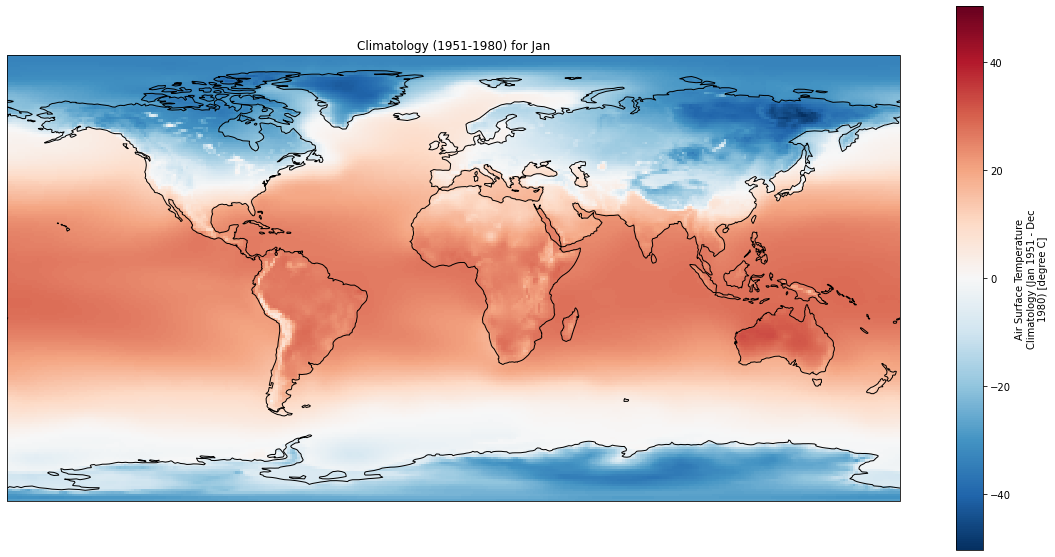

In [21]:
# Select a particular month to view
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
be.climatology[months.index(month)].plot(ax=ax)
plt.title('Climatology (1951-1980) for ' + month);

### Plot geographic distribution of temperature anomalies for given year and month

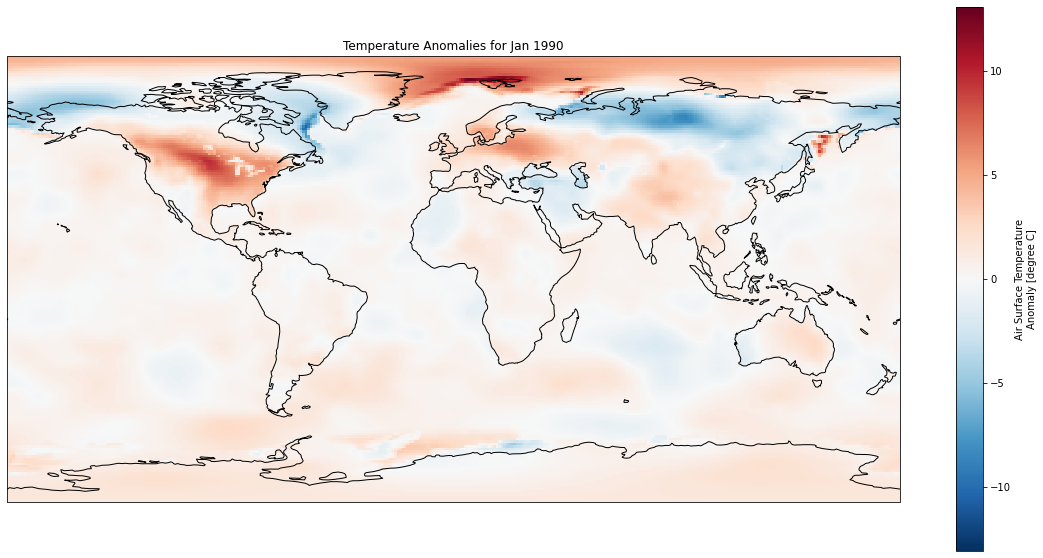

In [34]:
# Select a particular year and month to view
year = 1990
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
(be.temperature[months.index(month)+((year-1850)*12)]).plot(ax=ax, clim=[-10, 10])
plt.title('Temperature Anomalies for ' + month + ' ' + str(year));

### Plot geographic distribution of actual temperatures for given year and month

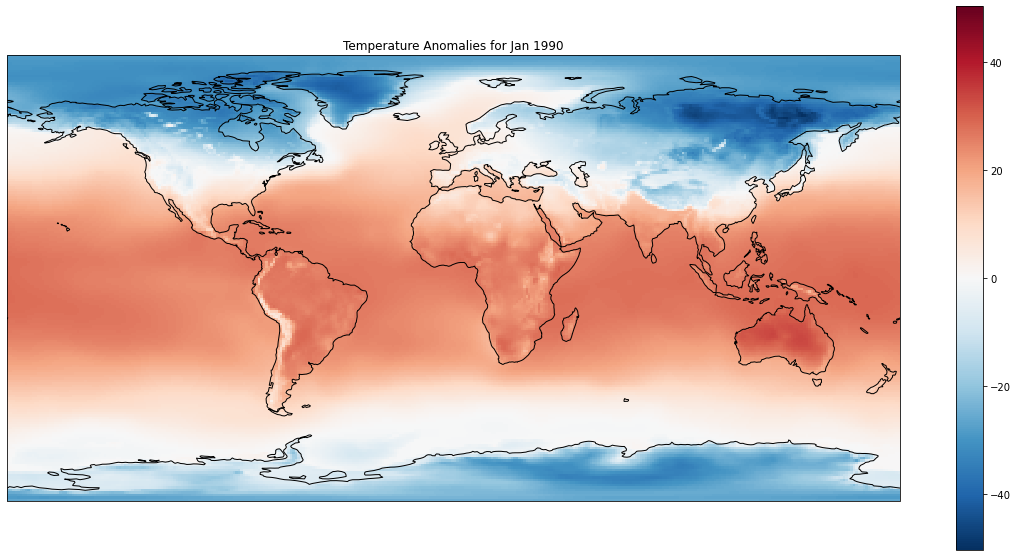

In [35]:
# Select a particular year and month to view
year = 1990
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
(be.temperature[months.index(month)+((year-1850)*12)] + be.climatology[months.index(month)]).plot(ax=ax, clim=[-10, 10])
plt.title('Temperature Anomalies for ' + month + ' ' + str(year));

### Calculate global annual temperature anomalies

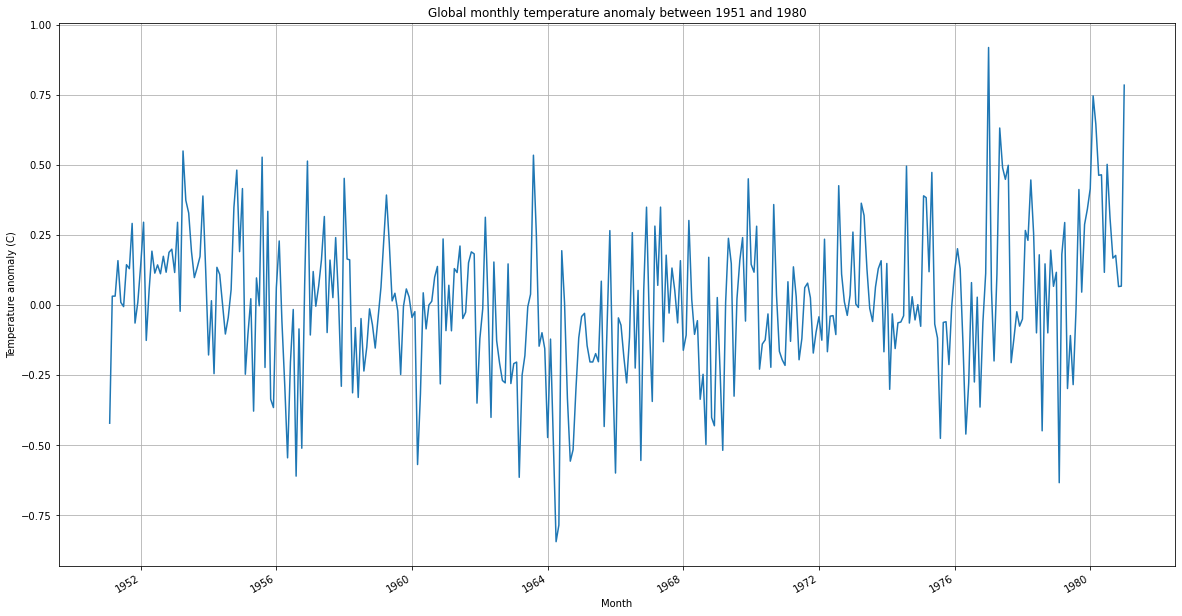

In [63]:
# Select a particular year and month to view
# !! Depending on how many years you choose to analyze, this COULD TAKE TENS OF SECONDS to complete.
beginning_year = 1951
ending_year = 1980

months = pd.date_range(start=str(beginning_year), end=str(ending_year+1), freq='M')

data = []
for month in months:
    #print(month.month)
    data.append(be.temperature[month.month+((month.year-1850)*12)].mean())

Tanomalies = xr.DataArray(data, coords={'month': months})

fig = plt.figure(figsize=(20,10))
Tanomalies.plot()
plt.grid()
plt.xlabel('Month');
plt.ylabel('Temperature anomaly (C)');
plt.title('Global monthly temperature anomaly between ' + str(beginning_year) + ' and ' + str(ending_year));